## **Chapter6: RNN & LSTN**
### **Ex1: One to one: international-airline-passengers**
- Cho dữ liệu international-airline-passengers.csv.
- Xây dựng model để dự đoán số hành khách cho thời gian tiếp theo
- Giải thích cách tính tham số từ summary của model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [5]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back-1):
        #t
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
        #t+1
            dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [13]:
# load the dataset
dataframe = pd.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   passengers_in_thousands  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


In [14]:
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset[:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [15]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [16]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [17]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


***Giải thích cách tính tham số***
- lstm_1 (LSTM) = [(num_units + input_dim + 1) x num_units] x 4 = [(4 + 1 + 1) x 4] x 4 = 96
- dense_1 = ((current layer n x previous layer n) + bias) = 1 x 4 + 1 = 5

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(trainX, trainY,
                    validation_data=(testX, testY),
                    epochs=100,
                    batch_size=1)

Epoch 1/100
94/94 [==============================] - 3s 10ms/step - loss: 0.0407 - val_loss: 0.2532
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.1884
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0167 - val_loss: 0.1615
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.1450
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.1377
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.1231
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.1160
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.1066
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0915
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0800
Epoch 11

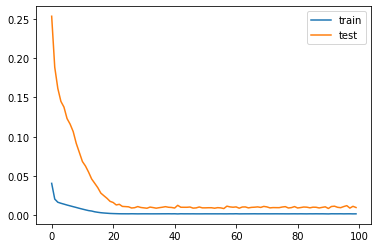

In [22]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [24]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [25]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.64 RMSE
Test Score: 51.79 RMSE


In [26]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

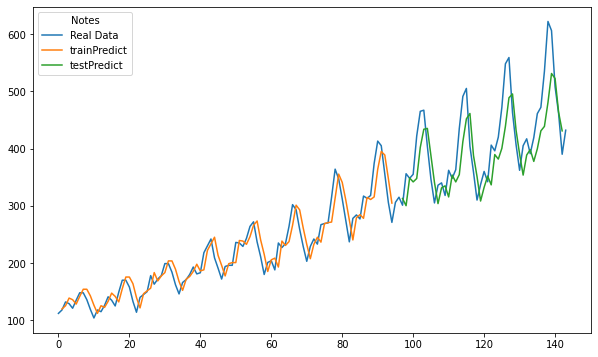

In [27]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()

In [28]:
# ws = {}
# for layer in model.layers:
# ws[layer.name] = layer.get_weights()
# ws

In [29]:
# x_new = 432 => next time = ?
x_new = scaler.transform([[432]])
x_new = numpy.reshape(x_new, (1, 1, 1))
y_new = model.predict(x_new)
y_new = scaler.inverse_transform(y_new)
y_new

array([[409.51892]], dtype=float32)

In [30]:
# Với lượng dữ liệu ít, bài toán này hoạt độnng chưa được tốt.